<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/denoising-autoencoder/blob/master/Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Source: https://blog.keras.io/building-autoencoders-in-keras.html*

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import random
import cv2

Using TensorFlow backend.


**MNIST Dataset**

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**ADDING NOISE**

In [0]:
#TRAINING SET
noise=np.array([[random.random() for i in range(x_train.shape[1])] for j in range(x_train.shape[0])])
noised_x_train=x_train+noise

In [0]:
#TESTING SET
noise=np.array([[random.random() for i in range(x_test.shape[1])] for j in range(x_test.shape[0])])
noised_x_test=x_test+noise

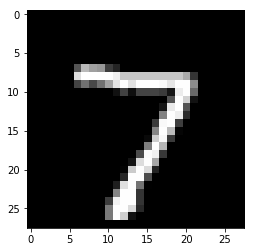

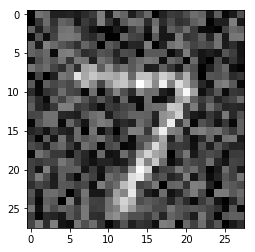

In [32]:
plt.gray()
plt.imshow(x_test[0].reshape(28,28))
plt.show()
plt.imshow(noised_x_test[0].reshape(28,28))

**MODEL**

In [2]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['mse'])

In [33]:
history=autoencoder.fit(noised_x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2779 - mean_squared_error: 0.0717 - val_loss: 0.4405 - val_mean_squared_error: 0.1195
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1932 - mean_squared_error: 0.0424 - val_loss: 0.3785 - val_mean_squared_error: 0.0989
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1640 - mean_squared_error: 0.0327 - val_loss: 0.3538 - val_mean_squared_error: 0.0911
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1494 - mean_squared_error: 0.0279 - val_loss: 0.3425 - val_mean_squared_error: 0.0874
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1403 - mean_squared_error: 0.0250 - val_loss: 0.3342 - val_mean_squared_error: 0.0842
Epoch 6/50
60000/60000 [==============================] - 1s 17us/s

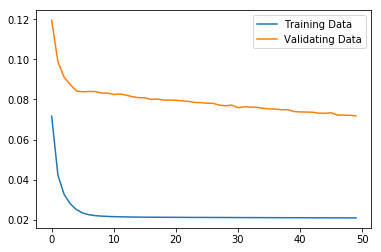

In [34]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['Training Data','Validating Data'])

**Testing on MNIST Test Set**

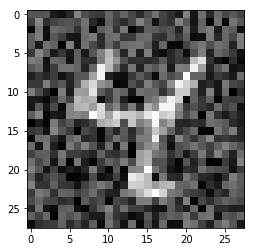

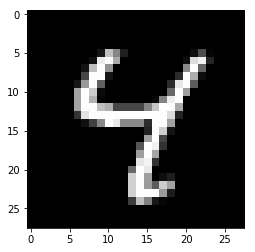

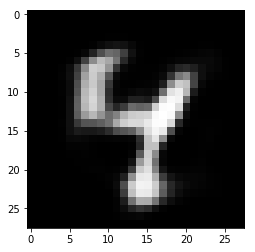

In [90]:
index=6
pred=autoencoder.predict(noised_x_test)
plt.imshow(noised_x_test[index].reshape(28, 28))
plt.gray()
plt.show()
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
plt.show()
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
plt.show()

**Testing on Custom Digit** ***(Not part of MNIST)***

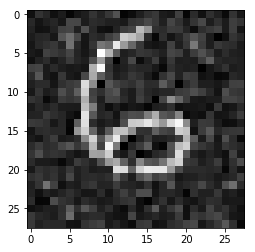

In [83]:
img=cv2.imread('6_noised.png', cv2.IMREAD_GRAYSCALE).reshape(1,784)
plt.imshow(img[0].reshape(28,28))

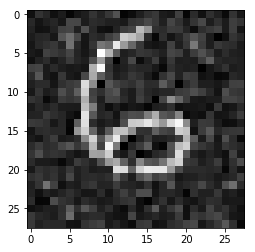

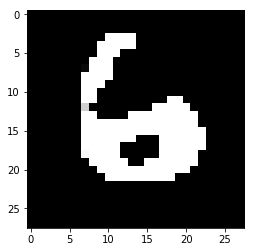

In [86]:
pred=autoencoder.predict(img)
plt.imshow(img[0].reshape(28, 28))
plt.gray()
plt.show()
plt.imshow(pred[0].reshape(28, 28))
plt.gray()
plt.show()